In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [17]:
# Define the file path
file_path = 'Dataset Obesity Raw.csv'

In [18]:
# Load the dataset from the Excel file
data = pd.read_csv(file_path)

# Display the dataset
print(data)

      Gender  Age Family History with Overweight  How many main meals  \
0     Female   21                            yes                    3   
1     Female   21                            yes                    3   
2       Male   23                            yes                    3   
3       Male   27                             no                    3   
4       Male   22                             no                    1   
...      ...  ...                            ...                  ...   
2105  Female   20                            yes                    3   
2106  Female   21                            yes                    3   
2107  Female   22                            yes                    3   
2108  Female   24                            yes                    3   
2109  Female   23                            yes                    3   

     Eat Between Meals Drinking water Technological Devices  \
0            Sometimes         Medium                  More 

# 1. Gender

In [19]:
# Count the occurrences of each gender
gender_counts = data['Gender'].value_counts()

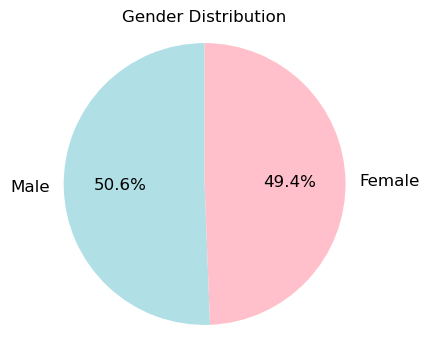

In [20]:
# Plotting the pie chart
plt.figure(figsize=(4,4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#B0E0E6','#FFC0CB'], startangle=90,  textprops={'fontsize': 12})
plt.title("Gender Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# 2. Family History about Overweight

In [21]:
# Count the occurrences of each category in 'Family History with Overweight'
family_history_counts = data['Family History with Overweight'].value_counts()

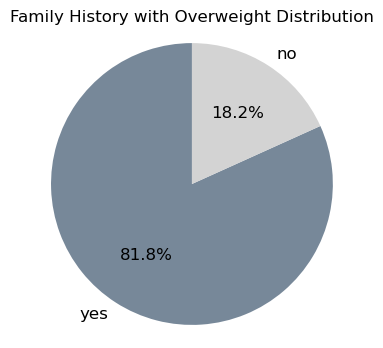

In [22]:
# Plotting the pie chart
plt.figure(figsize=(4,4))
plt.pie(family_history_counts, labels=family_history_counts.index, autopct='%1.1f%%', colors=['#778899','#D3D3D3'], startangle=90, textprops={'fontsize': 12})
plt.title('Family History with Overweight Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# 3. Age

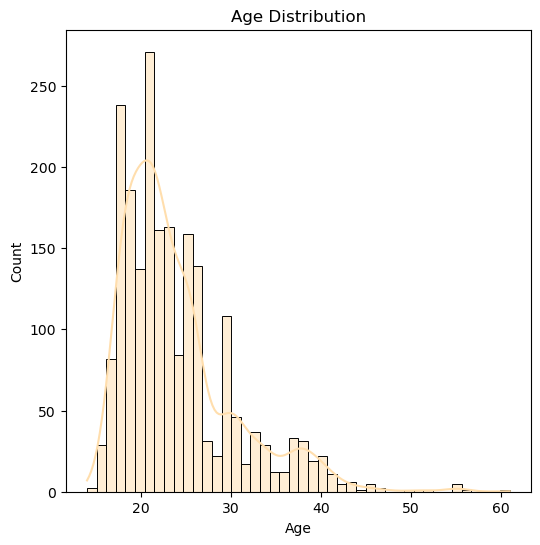

In [23]:
# Age distribution
plt.figure(figsize=(6, 6))
sns.histplot(data=data, x='Age', kde=True, color='#FFDEAD')
plt.title('Age Distribution')
plt.show()

# 4. Obesity Levels

In [24]:
# Count the occurrences of each category in 'Obesity Levels'
obesity_levels_counts = data['Obesity Levels'].value_counts()

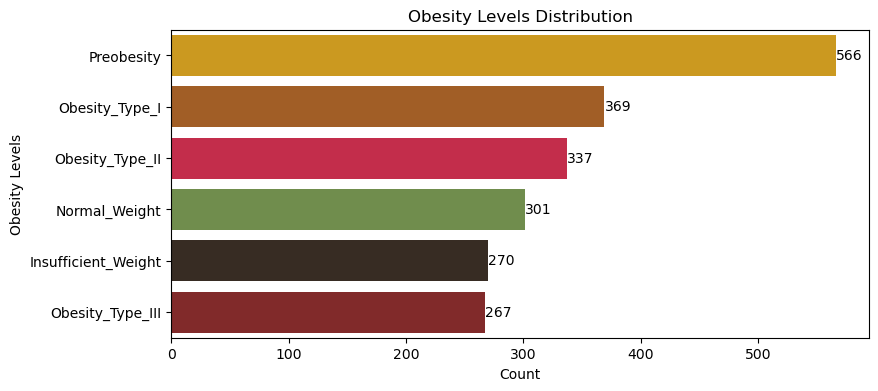

In [25]:
# Define a color palette that matches the order of your obesity levels
color_palette = {
    'Normal_Weight': '#719842',
    'Preobesity': '#e7a504',
    'Obesity_Type_I': '#b65c11',
    'Insufficient_Weight': '#3a2c20',
    'Obesity_Type_II': '#DC143C',
    'Obesity_Type_III': '#901b1b'
}

# Plotting the bar chart with fixed colors
plt.figure(figsize=(9, 4))
sns.barplot(
    y=obesity_levels_counts.index, 
    x=obesity_levels_counts.values, 
    palette=[color_palette[level] for level in obesity_levels_counts.index]
)

# Adding labels on the bars
for index, value in enumerate(obesity_levels_counts.values):
    plt.text(value, index, str(value), color='black', ha="left", va="center")
plt.title('Obesity Levels Distribution')
plt.xlabel('Count')
plt.ylabel('Obesity Levels')
plt.xticks(rotation=360)
plt.show()


# 5. Behavioural Factors

# - Drinking Water

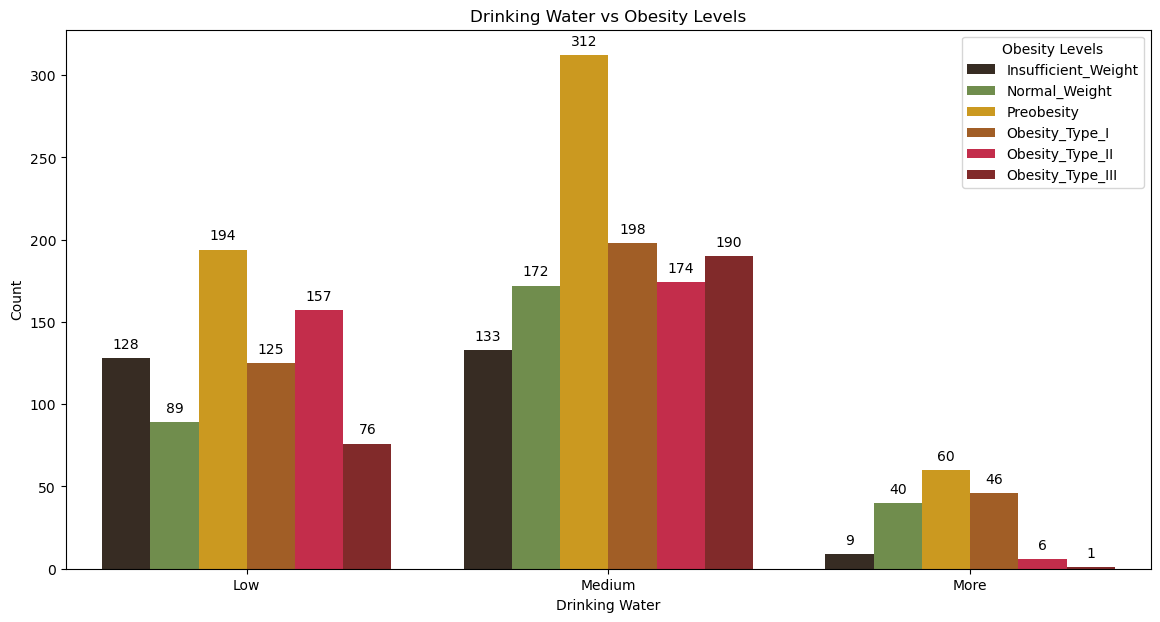

In [26]:
# Define a custom color palette that matches the obesity levels
color_palette = {
    'Insufficient_Weight': '#3a2c20',
    'Normal_Weight': '#719842',
    'Preobesity': '#e7a504',
    'Obesity_Type_I': '#b65c11',
    'Obesity_Type_II': '#DC143C',
    'Obesity_Type_III': '#901b1b'
}

# Define the order of the categories for Obesity Levels
obesity_order = ['Insufficient_Weight', 'Normal_Weight', 'Preobesity', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

# Convert the 'Obesity Levels' column to a categorical type with the specified order
data['Obesity Levels'] = pd.Categorical(data['Obesity Levels'], categories=obesity_order, ordered=True)

# Define the order of the categories for Drinking Water
drinking_water_order = ['Low', 'Medium', 'More']

# Convert the 'Drinking water' column to a categorical type with the specified order
data['Drinking water'] = pd.Categorical(data['Drinking water'], categories=drinking_water_order, ordered=True)

# Plotting the bar chart with grouped data
plt.figure(figsize=(14, 7))
barplot = sns.countplot(
    x='Drinking water', 
    hue='Obesity Levels', 
    data=data, 
    palette=[color_palette[level] for level in obesity_order]
)

# Adding the count labels on top of the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 10), 
                     textcoords='offset points')

plt.title('Drinking Water vs Obesity Levels')
plt.xlabel('Drinking Water')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Obesity Levels')
plt.show()

# - Using Technological Devices

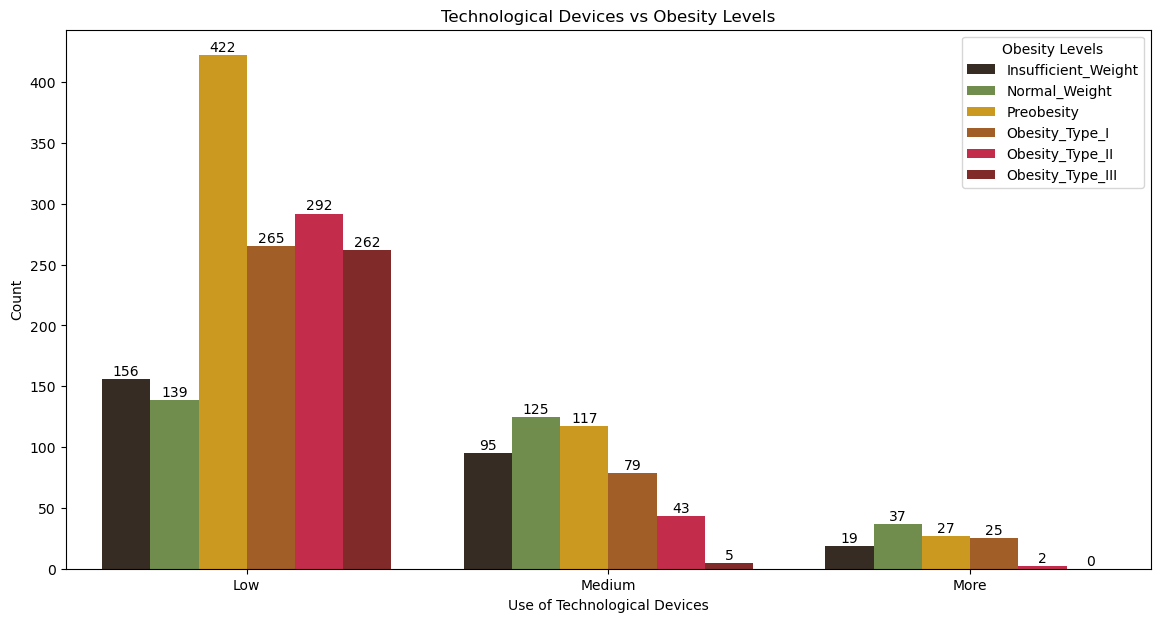

In [27]:
# Define a custom color palette that matches the obesity levels
color_palette = {
    'Insufficient_Weight': '#3a2c20',
    'Normal_Weight': '#719842',
    'Preobesity': '#e7a504',
    'Obesity_Type_I': '#b65c11',
    'Obesity_Type_II': '#DC143C',
    'Obesity_Type_III': '#901b1b'
}

# Define the order of the categories for Obesity Levels
obesity_order = ['Insufficient_Weight', 'Normal_Weight', 'Preobesity', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

# Convert the 'Obesity Levels' column to a categorical type with the specified order
data['Obesity Levels'] = pd.Categorical(data['Obesity Levels'], categories=obesity_order, ordered=True)

# Define the order of the categories for Technological Devices usage
tech_devices_order = ['Low', 'Medium', 'More']

# Convert the 'Technological Devices' column to a categorical type with the specified order
data['Technological Devices'] = pd.Categorical(data['Technological Devices'], categories=tech_devices_order, ordered=True)

# Plotting the bar chart with grouped data
plt.figure(figsize=(14, 7))
ax = sns.countplot(
    x='Technological Devices', 
    hue='Obesity Levels', 
    data=data, 
    palette=[color_palette[level] for level in obesity_order],
    order=tech_devices_order  # Ensures all categories are shown
)

# Adding the count labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2., 
        height + 3,  # Add a little offset to the height for better visibility
        f'{int(height)}', 
        ha="center"
    )

plt.title('Technological Devices vs Obesity Levels')
plt.xlabel('Use of Technological Devices')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Obesity Levels')
plt.show()

# - Usually Transportation Types

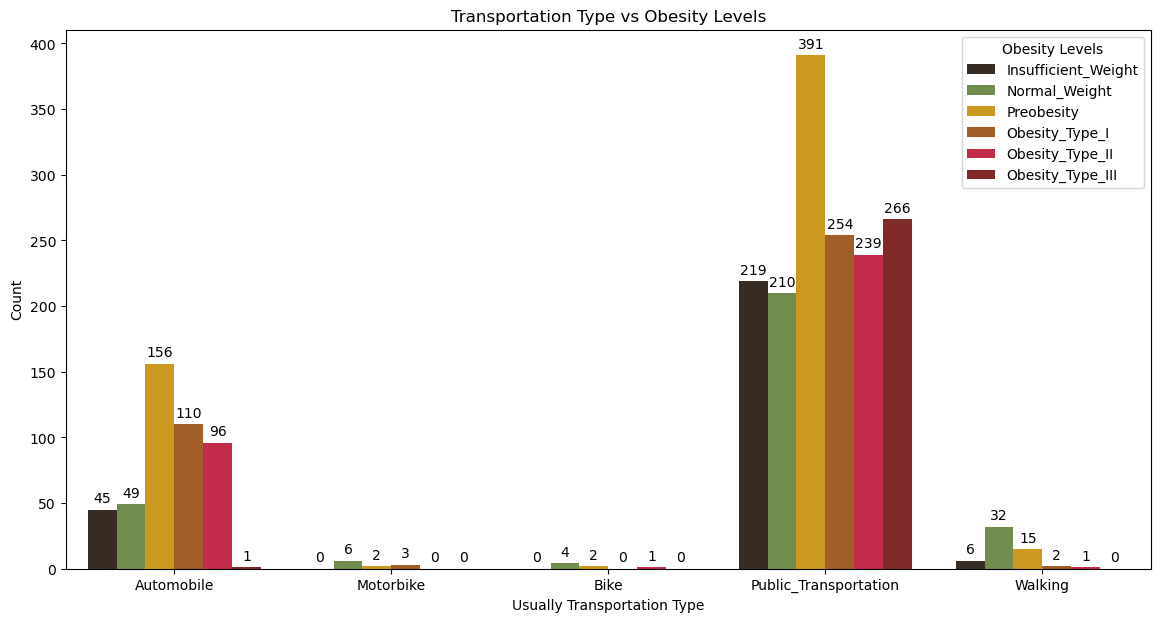

In [28]:
# Define a custom color palette that matches the obesity levels
color_palette = {
    'Insufficient_Weight': '#3a2c20',
    'Normal_Weight': '#719842',
    'Preobesity': '#e7a504',
    'Obesity_Type_I': '#b65c11',
    'Obesity_Type_II': '#DC143C',
    'Obesity_Type_III': '#901b1b'
}

# Define the order of the categories for Obesity Levels
obesity_order = ['Insufficient_Weight', 'Normal_Weight', 'Preobesity', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

# Convert the 'Obesity Levels' column to a categorical type with the specified order
data['Obesity Levels'] = pd.Categorical(data['Obesity Levels'], categories=obesity_order, ordered=True)

# Define the order of the categories for Transportation Type
transportation_order = ['Automobile', 'Motorbike', 'Bike', 'Public_Transportation', 'Walking']

# Convert the 'Usually Transportation Type' column to a categorical type with the specified order
data['Usually Transportation Type'] = pd.Categorical(data['Usually Transportation Type'], categories=transportation_order, ordered=True)

# Plotting the bar chart with grouped data
plt.figure(figsize=(14, 7))
barplot = sns.countplot(
    x='Usually Transportation Type', 
    hue='Obesity Levels', 
    data=data, 
    palette=[color_palette[level] for level in obesity_order],
    order=transportation_order  # Ensures all categories are shown in the specified order
)
# Adding labels to each bar, formatted as integers
for p in barplot.patches:
    height = int(p.get_height())  # Convert the height to an integer
    barplot.annotate(f'{height}', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='center', 
                     xytext=(0, 8), 
                     textcoords='offset points')


plt.title('Transportation Type vs Obesity Levels')
plt.xlabel('Usually Transportation Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Obesity Levels')
plt.show()

# - Eating Between Meals

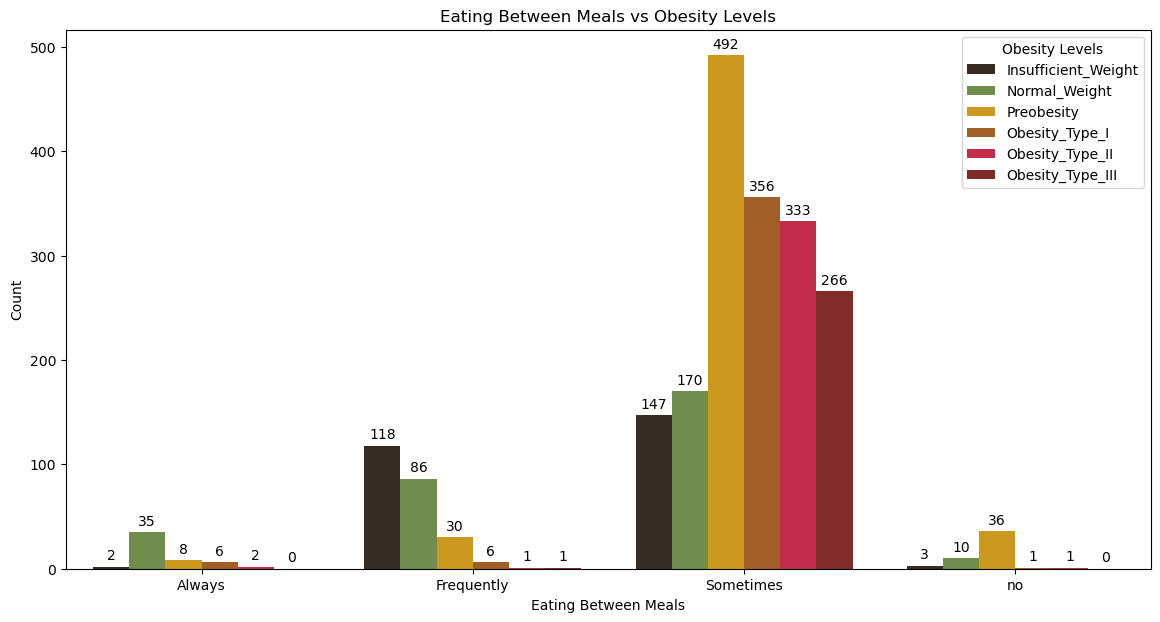

In [29]:
# Define a custom color palette that matches the obesity levels
color_palette = {
    'Insufficient_Weight': '#3a2c20',
    'Normal_Weight': '#719842',
    'Preobesity': '#e7a504',
    'Obesity_Type_I': '#b65c11',
    'Obesity_Type_II': '#DC143C',
    'Obesity_Type_III': '#901b1b'
}

# Define the order of the categories for Obesity Levels
obesity_order = ['Insufficient_Weight', 'Normal_Weight', 'Preobesity', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

# Convert the 'Obesity Levels' column to a categorical type with the specified order
data['Obesity Levels'] = pd.Categorical(data['Obesity Levels'], categories=obesity_order, ordered=True)

# Define the order of the categories for Eating Between Meals
eating_order = ['Always', 'Frequently', 'Sometimes', 'no']

# Convert the 'Eat Between Meals' column to a categorical type with the specified order
data['Eat Between Meals'] = pd.Categorical(data['Eat Between Meals'], categories=eating_order, ordered=True)

# Plotting the bar chart with grouped data
plt.figure(figsize=(14, 7))
barplot = sns.countplot(
    x='Eat Between Meals', 
    hue='Obesity Levels', 
    data=data, 
    palette=[color_palette[level] for level in obesity_order],
    order=eating_order  # Ensures all categories are shown in the specified order
)

# Adding labels to each bar
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{int(height)}', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='center', 
                     xytext=(0, 8), 
                     textcoords='offset points')



plt.title('Eating Between Meals vs Obesity Levels')
plt.xlabel('Eating Between Meals')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Obesity Levels')
plt.show()

# - How Many Main Meals 

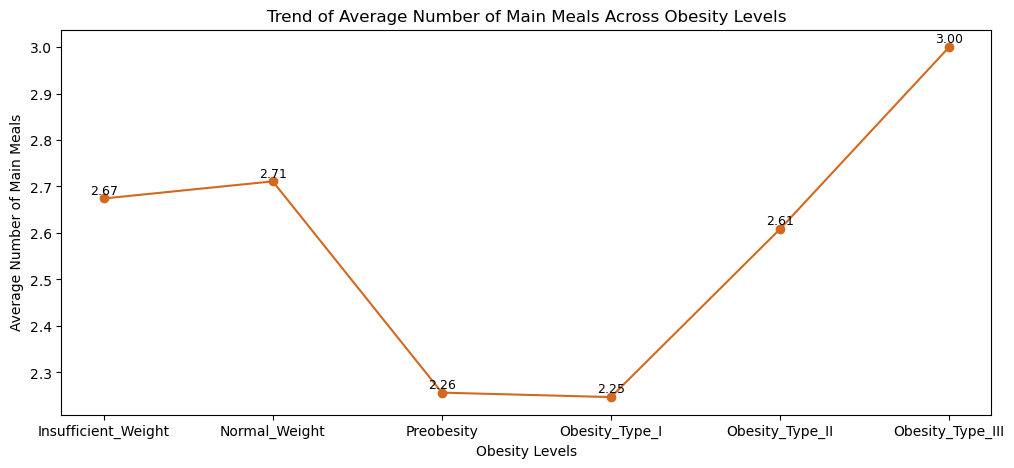

In [30]:
plt.figure(figsize=(12, 5))

# Calculate the mean number of main meals for each obesity level
mean_meals = data.groupby('Obesity Levels')['How many main meals'].mean()

# Plot the line graph
plt.plot(mean_meals.index, mean_meals.values, marker='o', color='#D2691E')

# Add title and labels
plt.title('Trend of Average Number of Main Meals Across Obesity Levels')
plt.xlabel('Obesity Levels')
plt.ylabel('Average Number of Main Meals')
plt.xticks(rotation=0)

# Annotate each data point with its value, with larger font size
for i in range(len(mean_meals)):
    plt.text(mean_meals.index[i], mean_meals.values[i] + 0.003, f'{mean_meals.values[i]:.2f}', 
             ha='center', va='bottom', fontsize=9)

# Show the plot
plt.show()